In [1]:
%matplotlib notebook
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

# Reflect Tables into SQLAlchemy ORM

In [73]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func, distinct

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
# Inspect database for info
inspector = inspect(engine)
print(inspector.get_table_names())

columns = inspector.get_columns('measurement')
measureCols = []
for c in columns:
    measureCols.append(c['name'])
    
columns = inspector.get_columns('station')
stationCols = []
for c in columns:
    stationCols.append(c['name'])

['measurement', 'station']


# Exploratory Climate Analysis

In [65]:
# Calculate the date 1 year ago from today
qryLD = session.query(func.max(Measurement.date).label("lastDay"))
result = qryLD.one()
maxDate = result.lastDay

lastDay = dt.strptime(maxDate, '%Y-%m-%d')

pastYear = lastDay - relativedelta(years=1)
print(pastYear)

# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurementData = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).filter(Measurement.date > pastYear)

measurementDF = pd.DataFrame(measurementData[:-1], columns=measureCols)
measurementDF

2016-08-23 00:00:00


,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1,2366,USC00519397,2016-08-25,0.08,80.0
2,2367,USC00519397,2016-08-26,0.00,79.0
3,2368,USC00519397,2016-08-27,0.00,77.0
4,2369,USC00519397,2016-08-28,0.01,78.0
5,2370,USC00519397,2016-08-29,0.00,78.0
6,2371,USC00519397,2016-08-30,0.00,79.0
7,2372,USC00519397,2016-08-31,0.13,80.0
8,2373,USC00519397,2016-09-01,0.00,81.0
9,2374,USC00519397,2016-09-02,0.00,80.0


In [ ]:
# Calculate the date 1 year ago from today
qryLD = session.query(func.max(Measurement.date).label("lastDay"))
result = qryLD.one()
maxDate = result.lastDay

lastDay = dt.strptime(maxDate, '%Y-%m-%d')

pastYear = lastDay - relativedelta(years=1)
print(pastYear)

# Perform a query to retrieve the date and precipitation scores
prcpData = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > pastYear)
 
# Save the query results as a Pandas DataFrame and set the index to the date column
prcpDF = pd.DataFrame(prcpData[:-1], columns=["date", "prcp"])
prcpDateDF = prcpDF.set_index("date")

# Sort the dataframe by date
prcpDateDF = prcpDateDF.sort_values(by=["date"], ascending=False)

# Clean dataframe
prcpDFclean = prcpDateDF.dropna(axis=0, how="any")

<IPython.core.display.Javascript object>


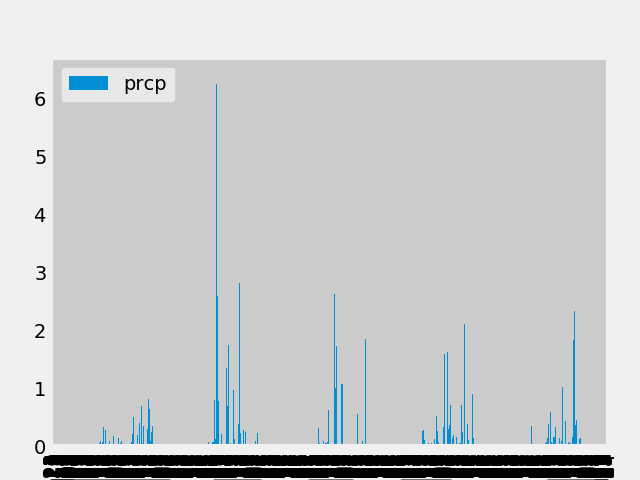

In [64]:
# Use Pandas Plotting with Matplotlib to plot the data
maxprcp = max(prcpDateDF.prcp)
prcpDateDF.plot(kind="bar", grid=True, ylim=(0, maxprcp))

<IPython.core.display.Javascript object>


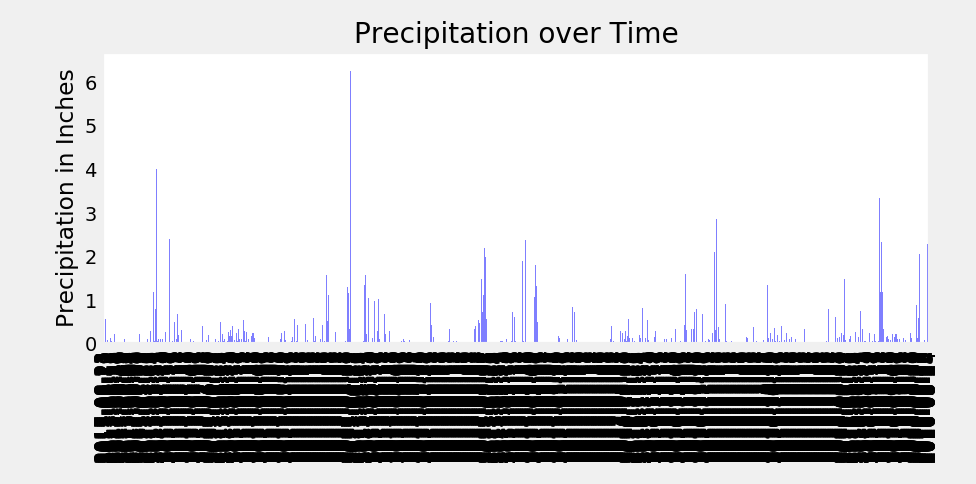

In [37]:
###### NOT USING THIS BLOCK ######


# Set x axis and tick locations
x_axis = np.arange(len(prcpDFclean))
tick_locations = [value for value in x_axis]

# Use Pandas Plotting with Matplotlib to plot the data
plt.figure()
plt.bar(x_axis, prcpDFclean["prcp"], color='b', alpha=0.5, align="center")

# Rotate the xticks for the dates
plt.xticks(tick_locations, prcpDFclean["date"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(prcpDFclean["prcp"]))
plt.grid(b=True, which="major", color='w', linestyle='-', linewidth=2)


# Set a Title and labels
plt.title("Precipitation over Time")
plt.ylabel("Precipitation in Inches")

plt.tight_layout()

In [31]:
help(plt.grid)

Help on function grid in module matplotlib.pyplot:

grid(b=None, which='major', axis='both', **kwargs)
    Turn the axes grids on or off.
    
    Set the axes grids on or off; *b* is a boolean.
    
    If *b* is *None* and ``len(kwargs)==0``, toggle the grid state.  If
    *kwargs* are supplied, it is assumed that you want a grid and *b*
    is thus set to *True*.
    
    *which* can be 'major' (default), 'minor', or 'both' to control
    whether major tick grids, minor tick grids, or both are affected.
    
    *axis* can be 'both' (default), 'x', or 'y' to control which
    set of gridlines are drawn.
    
    *kwargs* are used to set the grid line properties, e.g.,::
    
       ax.grid(color='r', linestyle='-', linewidth=2)
    
    Valid :class:`~matplotlib.lines.Line2D` kwargs are
    
      agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
      alpha: float (0.0 transparent through 1.0 opaque) 
      animated: 

![precipitation](Images/precipitation.png)

In [58]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcpDF.describe()

,prcp
count,2014.000000
mean,0.176326
std,0.460362
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [81]:
# How many stations are available in this dataset?
session.query(Measurement.station).group_by(Measurement.station).count()

# measurementDF["station"].nunique()  <- this query is looking at a one year subset of the data

9

In [99]:
# What are the most active stations?
# List the stations and the counts in descending order.
stationCount = func.count(Measurement.station)
session.query(Measurement.station, stationCount).group_by(Measurement.station).order_by(stationCount.desc()).all()

# measurementDF["station"].value_counts()  <- this query is looking at a one year subset of the data

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [96]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
minTemp = func.min(Measurement.tobs).label("Lowest Temperature")
maxTemp = func.max(Measurement.tobs).label("Highest Temperature")
avgTemp = func.avg(Measurement.tobs).label("Average Temperature")

session.query(minTemp, maxTemp, avgTemp).filter_by(station="USC00519281").all()

# measurementDF["station"]["USC00519397"]

[(54.0, 85.0, 71.66378066378067)]

In [103]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
popStationData = session.query(Measurement.date, Measurement.tobs).filter_by(station="USC00519281").filter(Measurement.date > pastYear).all()
popStationData

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [104]:
# Save the query results as a Pandas DataFrame and set the index to the date column
tobsDF = pd.DataFrame(popStationData[:-1], columns=["date", "tobs"])
tobsDateDF = tobsDF.set_index("date")

# Sort the dataframe by date
tobsDateDF = tobsDateDF.sort_values(by=["date"], ascending=False)

# Clean dataframe
tobsDateDFclean = tobsDateDF.dropna(axis=0, how="any")
tobsDateDFclean.head()

,tobs
date,
2017-08-17,76.0
2017-08-16,76.0
2017-08-15,77.0
2017-08-14,77.0
2017-08-13,77.0


<IPython.core.display.Javascript object>


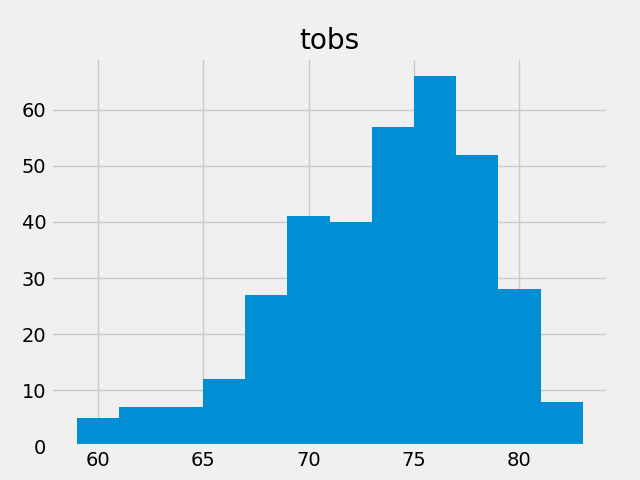

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000241265A3710>]],
      dtype=object)

In [106]:
# Use Pandas Plotting with Matplotlib to plot the data
maxtobs = max(tobsDateDFclean.tobs)
tobsDateDFclean.hist(bins=12)

In [ ]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVG, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`


# Step 2: Climate App

In [ ]:
# Now that you have completed your initial analysis, design a Flask API based on the queries that you have just developed.
# Use FLASK to create your routes.

# You will need to join the station and measurement tables for some of the analysis queries.

# Use Flask jsonify to convert your API data into a valid JSON response object.  jsonify()

In [ ]:
from flask import Flask, jsonify

# Dictionary of Justice League
justice_league_members = [
    {"superhero": "Aquaman", "real_name": "Arthur Curry"},
    {"superhero": "Batman", "real_name": "Bruce Wayne"},
    {"superhero": "Cyborg", "real_name": "Victor Stone"},
    {"superhero": "Flash", "real_name": "Barry Allen"},
    {"superhero": "Green Lantern", "real_name": "Hal Jordan"},
    {"superhero": "Superman", "real_name": "Clark Kent/Kal-El"},
    {"superhero": "Wonder Woman", "real_name": "Princess Diana"}
]


app = Flask(__name__)


@app.route("/api/v1.0/precipitation")
# Query for the dates and temperature observations from the last year.
# Convert the query results to a Dictionary using date as the key and tobs as the value.
# Return the JSON representation of your dictionary.
def justice_league():

    return jsonify(justice_league_members)


@app.route("/api/v1.0/stations")
# Return a JSON list of stations from the dataset.
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league"
    )


@app.route("/api/v1.0/tobs")
# Return a JSON list of Temperature Observations (tobs) for the previous year.
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league"
    )


@app.route("/api/v1.0/<start> and /api/v1.0/<start>/<end>")
# Return a JSON list of the minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
# When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
# When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.
def welcome():
    return (
        f"Welcome to the Justice League API!<br/>"
        f"Available Routes:<br/>"
        f"/api/v1.0/justice-league"
    )


if __name__ == "__main__":
    app.run(debug=True)